In [1]:
# importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import base64

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
CALLS_DATASET = "data/call_in_progress_Jan1_2018_24Sep_2018.csv"
DURATION_DATASET = "data/call_duration_Jan1_2018_24Sep_2018.csv"
FRAUD_DATASET = "data/fraudcalls_Jan1_2018_24Sep_2018.csv"

In [3]:
#loading datasets

calls = pd.read_csv(CALLS_DATASET)
fraudcalls = pd.read_csv(FRAUD_DATASET)
callduration = pd.read_csv(DURATION_DATASET)

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# convert time 
calls['_time'] = pd.to_datetime(calls._time)
fraudcalls['_time'] = pd.to_datetime(fraudcalls._time)

#drop duplicates
calls.drop_duplicates(subset="vsg_tid",inplace=True)
callduration.drop_duplicates(subset="vsg_tid",inplace=True)

print(calls.shape, callduration.shape, len(calls.vsg_tid.unique()),len(callduration.vsg_tid.unique()))

((2571578, 9), (1865928, 2), 2571578, 1865928)


In [5]:
calls.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571578 entries, 0 to 2571767
Data columns (total 9 columns):
_time                datetime64[ns]
intuit_tid           object
vsg_tid              object
intuit_appid         object
intuit_offeringid    object
Called               object
ToState              object
ToZip                object
ToCity               object
dtypes: datetime64[ns](1), object(8)
memory usage: 196.2+ MB


In [7]:
callduration.head()

,vsg_tid,Duration
0,3d70059f-9d70-4d31-8f23-26b027982dd7,5
1,c9528eec-025e-49a2-aa1e-dfcb9e8c5168,7
2,ce65e209-91ec-4836-9516-2480bb30a001,7
3,7b934028-a0f4-485e-8fde-f286d9e75e04,7
4,376904e3-c8eb-47df-a93c-3564de601d8b,7


In [8]:
callduration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865928 entries, 0 to 1866105
Data columns (total 2 columns):
vsg_tid     object
Duration    int64
dtypes: int64(1), object(1)
memory usage: 42.7+ MB


In [9]:
# merge calls and callduration
df = pd.merge(calls, callduration, how="left",on="vsg_tid")

#validate the merge
print(calls.shape, callduration.shape, df.shape)

((2571578, 9), (1865928, 2), (2571578, 10))


### Data Analysis

In [10]:
#check which phone number is called frequently
df[df.Called.isin(df.Called.value_counts().index[:100])]

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
15,2018-05-30 22:55:14.049,aa40c63c-1395-4ba2-802d-30c87320b2bb,d791f6a1-db3b-483f-9d7e-7a3c9a6a4762,Intuit.cto.iam.ticket,Intuit.smallbusiness.qbo.beanstalk,KzE0MDQ0NjIyODU2,GA,30082,SMYRNA,27.0
30,2018-05-30 20:36:47.561,ebb5cf5b-9d3c-4731-85f8-9cd06f20e72e,9a7ceb63-fa88-4be1-97f6-02b9bf0f2e3e,Intuit.cto.iam.ticket,Intuit.platform.lacertetax.lacertetaxty17,KzE3NzU0MjMxMDQw,NV,89406,FALLON,27.0
38,2018-05-30 19:50:53.539,d32dd3ea-084c-47ce-8bad-aa212eed7b8f,fbad11ce-8c1d-4317-b0f4-381c645d7de4,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE2NjI1MzQwMDA2,MS,38610,NEW ALBANY,26.0
75,2018-05-30 16:03:49.678,6ffe3cc6-0621-45bd-91c9-126d46223654,f24d74e5-ccb6-4e7c-a928-00f4653771d8,Intuit.cto.iam.ticket,Intuit.apd.ito,KzE0MTczMzc5ODE3,MO,65739,BRANSON,23.0
99,2018-05-30 11:52:50.623,4e4ed1c3-3f6f-46c4-b5ad-8d0b8d85c386,82f69d71-3368-4fb2-a080-6c081acec752,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE0NjkyMjI3NDE4,TX,75074,DALLAS,24.0
132,2018-05-29 19:47:15.786,31def36a-4999-4b6a-9284-2c6c6c8e265e,626e385e-b712-4012-a9c3-ad35bf9329d5,Intuit.cto.iam.ticket,Intuit.ems.iop,KzE5Mzc0Njk3MzAy,OH,45469,DAYTON,NaN
201,2018-05-29 12:28:16.967,80ba3e18-0179-4bf2-9dc8-09f619a822c0,c46a3d87-c64c-4f76-9713-376530b0ea73,Intuit.cto.iam.ius,Intuit.sbe.salsa.platform,KzE5MTIzODQ5MTMw,GA,31567,DOUGLAS,28.0
268,2018-05-27 16:39:53.148,0a7e1a05-f898-4fbb-b5e2-a5d540af3afe,17c0f17d-987b-42e0-bda7-a3d6041933ba,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty16,KzE5MDQzNDc1NTUy,FL,32218,ST AUGUSTINE,26.0
350,2018-05-25 17:00:41.512,6afc54ed-7727-4838-a79f-33f000567649,8df09b77-b2b6-4d9e-8967-a554c94c6130,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE2MTk2Nzc2NDc1,CA,92103,SAN DIEGO,NaN
391,2018-05-24 19:03:51.350,3e11f3d2-2ae0-47fc-acb7-6bc4e4620cd0,9467725c-805f-4d60-a508-9ff1d00ea9f2,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzEzMjM1NzA2NDQ5,CA,90017,LOS ANGELES,16.0


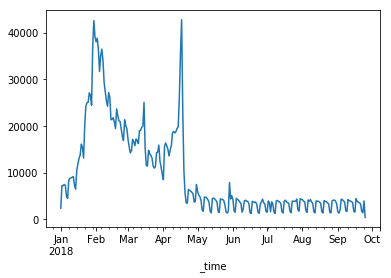

In [11]:
# plot trend of calls daily
(df
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot())

In [14]:
# plot trend of calls hourly
(df
 .set_index('_time')
 .resample('H')
 .rolling(1)
 .mean()
 .plot())

AttributeError: 'DatetimeIndexResampler' object has no attribute 'rolling'

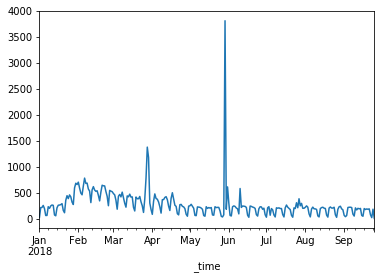

In [13]:
# plot the trend of calls daily for the top 1000 phone numbers
(df[df.Called.isin(df.Called.value_counts().index[:1000])]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot())

In [14]:
# pick the top 100 frequently called numbers to study their trend
df_100_frequent = df[df.Called.isin(df.Called.value_counts().index[:100])]

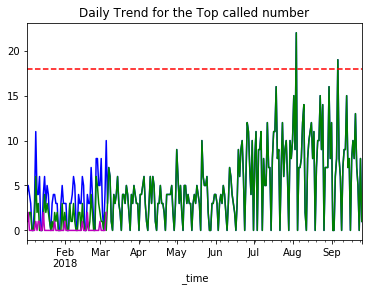

In [15]:
(df[df.Called==df.Called.value_counts().index[0]]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='b'))

(df[(df.Called==df.Called.value_counts().index[0]) & (df.intuit_offeringid=='Intuit.sbe.salsa.default')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='g'))

(df[(df.Called==df.Called.value_counts().index[0]) & (df.intuit_offeringid=='Intuit.ifs.mint')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='m'))

plt.axhline(y=18, color='r', linestyle='--')
plt.title("Daily Trend for the Top called number")
plt.show()

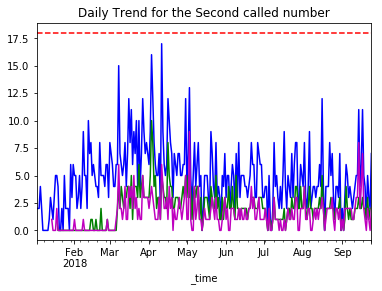

In [16]:
(df[df.Called==df.Called.value_counts().index[1]]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='b'))

(df[(df.Called==df.Called.value_counts().index[1]) & (df.intuit_offeringid=='Intuit.platform.proseries.basic.ty17')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='g'))

(df[(df.Called==df.Called.value_counts().index[1]) & (df.intuit_offeringid=='Intuit.platform.proseries.ty17')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='m'))

plt.axhline(y=18, color='r', linestyle='--')
plt.title("Daily Trend for the Second called number")
plt.show()

### Features extraction

Based on the analysis and knowledge that we have currently, we wanted to extract the below mentioned features.
1. days since last call
2. calls in last 30 days
3. calls in last 7 days
4. calls in last 1 day
5. calls in last 1 hr
6. hour of the call
7. number starts with premium
8. was identified as fraud in last 6 months
9. was last call from same offering id

In [17]:
#extracting 'days_since_last_call'

In [19]:
df_called = df[df.Called == df.Called[0]]

In [23]:
df_called = df_called.sort_values(by='_time')

In [26]:
df_called

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
517111,2018-01-18 07:09:50.783,071a423c-f5c2-4c8d-9dbf-3dd935326af5,1346f2b0-551e-4a31-b797-5414b209aa42,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,4.0
1044729,2018-01-18 07:10:37.848,abf2397c-7762-4fc8-949d-993a5e17ec54,2921466c-414d-4957-a59b-188d71192500,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,13.0
2093753,2018-03-11 03:18:30.702,fdbdd9ae-fa74-4209-a819-01a68a672031,ade03e65-76d9-49dd-8815-6bf1761e6c91,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,6.0
2405814,2018-03-11 03:23:24.219,3d321c5c-5dda-46a0-95d5-5bf7514a0707,85418dd6-9b68-42c7-bf28-ff9010286387,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,5.0
154767,2018-05-20 10:20:25.458,4d6d0ab6-a830-4592-c6a0-bb7d8438fcfe,695dccbb-fab6-48a0-94a6-139291fec6ce,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,6.0
63144,2018-05-20 10:26:34.440,7e4c03aa-d047-4e71-860b-22ae99746fe1,4630d732-67f5-42f7-8c6b-8d98316abd0c,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,3.0
47091,2018-05-20 10:26:45.545,cbad6f8e-4937-4e86-8bf4-9aae793fddeb,8c5ffefc-e4fc-460e-9cc4-3dd2cf000806,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,3.0
2189886,2018-05-29 13:11:43.437,39232439-8610-4279-aa66-1d230eac5ace,86c32554-84a9-489b-ac56-6cbe18772be5,Intuit.cto.iam.ius,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,NaN
1933498,2018-05-30 03:30:34.857,04d0417a-c4a0-45c3-b86c-31e0d7b56a44,d4045168-0a59-40f6-a3a3-fd3b47a9080c,Intuit.platform.voiceservicegateway.vsguswest2...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,NaN
14272,2018-05-31 07:51:14.227,2e7b5298-921f-4e64-1cac-e2cd9d119ac1,5ffc4246-bded-4673-91f9-fb3c61dd4e4b,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,4.0


In [36]:
df_called.iloc[0]

_time                                       2018-01-18 07:09:50.783000
intuit_tid                        071a423c-f5c2-4c8d-9dbf-3dd935326af5
vsg_tid                           1346f2b0-551e-4a31-b797-5414b209aa42
intuit_appid         Intuit.platform.voiceservicegateway.voicetestc...
intuit_offeringid                                                  NaN
Called                                            KzkxOTc0MTAwNDEwMA==
ToState                                                            NaN
ToZip                                                              NaN
ToCity                                                             NaN
Duration                                                             4
Name: 517111, dtype: object

In [37]:
df_called_index = df_called.DataFrame(index='_time')

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [38]:
df.date_range(2018-01-18 , 2018-03-11 , freq='W')

AttributeError: 'DataFrame' object has no attribute 'date_range'

In [44]:
print(pd.__version__)


0.23.4


In [45]:
import datetime

In [48]:
df_called[(df_called['_time'] > datetime.date(2018,01,17)) & (df_called['_time'] < datetime.date(2018,03,12))]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
517111,2018-01-18 07:09:50.783,071a423c-f5c2-4c8d-9dbf-3dd935326af5,1346f2b0-551e-4a31-b797-5414b209aa42,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,4.0
1044729,2018-01-18 07:10:37.848,abf2397c-7762-4fc8-949d-993a5e17ec54,2921466c-414d-4957-a59b-188d71192500,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,13.0
2093753,2018-03-11 03:18:30.702,fdbdd9ae-fa74-4209-a819-01a68a672031,ade03e65-76d9-49dd-8815-6bf1761e6c91,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,6.0
2405814,2018-03-11 03:23:24.219,3d321c5c-5dda-46a0-95d5-5bf7514a0707,85418dd6-9b68-42c7-bf28-ff9010286387,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,5.0


In [50]:
df.Called[df.Called.index]

0          KzkxOTc0MTAwNDEwMA==
1              KzEyNTM3NTI3NTI4
2          KzkxOTAzMDMyNDg3Mw==
3              KzE5MDgzMzYyNTk2
4              KzE5MTQzOTYwNTU4
5              KzEzMTM4MjY0ODEz
6              KzE3NzA1Mzk1NjI2
7              KzE0MTA2OTg1NzEy
8              KzEzMDU2MzQwNzY3
9              KzEyMjgyMTkzMzQw
10             KzE4MTkzMjY3NjE5
11             KzE3NjM2MDAxNDAy
12             KzE0MDg1OTQ1NTc3
13             KzEzMTAzMjYzOTYy
14             KzEyMDYzMjU0NTI2
15             KzE0MDQ0NjIyODU2
16             KzE3MjQ4MDI3OTk4
17             KzE0MDY0NDM2NTM4
18             KzEzMDc1ODc1MzEw
19             KzE1NzA2MjkwNjEw
20             KzE1NzA3NTI4NzE1
21             KzEyNTIyNjYwNTcx
22             KzE1MjA2NjQyMjEw
23             KzE2MTU1OTM5NzE0
24             KzEyMTAyNTgyMTAw
25             KzE5MDk5NDkxMTgx
26             KzE2NjE3MjE3NTg4
27             KzE3MTI0NzIyNTAx
28             KzE5NzA0ODQ3MDQw
29             KzE3MTk0ODE2NDI1
                   ...         
2571548 